In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
clean_df = pd.read_csv('no_missing_data.csv')

In [2]:
clean_df.shape

(2927, 86)

In [3]:
clean_df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2927 non-null   object
 1   Lot Shape       2927 non-null   object
 2   Land Contour    2927 non-null   object
 3   Utilities       2927 non-null   object
 4   Lot Config      2927 non-null   object
 5   Land Slope      2927 non-null   object
 6   Neighborhood    2927 non-null   object
 7   Condition 1     2927 non-null   object
 8   Condition 2     2927 non-null   object
 9   Bldg Type       2927 non-null   object
 10  House Style     2927 non-null   object
 11  Roof Style      2927 non-null   object
 12  Roof Matl       2927 non-null   object
 13  Exterior 1st    2927 non-null   object
 14  Exterior 2nd    2927 non-null   object
 15  Exter Qual      2927 non-null   object
 16  Exter Cond      2927 non-null   object
 17  Foundation      2927 non-null   object
 18  Heating 

We will go trough all the remaning cathegorical features and based on our analysis we wil either normalise, one hot encode or remove the feature.

In [4]:
clean_df['MS Zoning'].value_counts()

MS Zoning
RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

In [5]:
#get the average price for each category in 'MS Zoning'
clean_df.groupby('MS Zoning')['SalePrice'].mean().sort_values(ascending=False)

MS Zoning
FV         218986.949640
RL         191302.062115
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

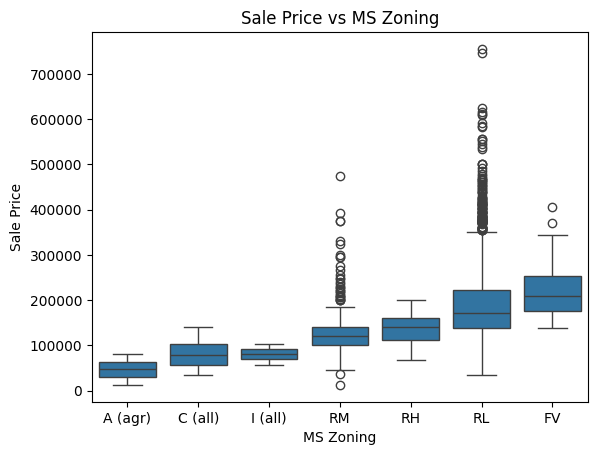

In [6]:
order = ['A (agr)', 'C (all)', 'I (all)', 'RM', 'RH', 'RL', 'FV']
sns.boxplot(x='MS Zoning', y='SalePrice', data=clean_df, order=order)
plt.xlabel('MS Zoning')
plt.ylabel('Sale Price')
plt.title('Sale Price vs MS Zoning')
plt.show()

In [7]:
df_copy = clean_df.copy(deep=True)

In [8]:
df_copy.shape

(2927, 86)

In [9]:
ms_zoning_map = {
    'A (agr)': 0,
    'C (all)': 1,
    'I (all)': 2,
    'RH': 3,
    'FV': 4,
    'RM': 5,
}
df_copy['MSZoning_encoded'] = df_copy['MS Zoning'].map(ms_zoning_map)
print(df_copy['MSZoning_encoded'].value_counts())
df_copy = df_copy.drop(['MS Zoning'], axis=1)

MSZoning_encoded
5.0    462
4.0    139
3.0     27
1.0     25
2.0      2
0.0      2
Name: count, dtype: int64


In [10]:
print(df_copy['Lot Shape'].value_counts())
print(df_copy.groupby('Lot Shape')['SalePrice'].mean().sort_values(ascending=False))

Lot Shape
Reg    1858
IR1     977
IR2      76
IR3      16
Name: count, dtype: int64
Lot Shape
IR2    229588.355263
IR3    221922.812500
IR1    210895.359263
Reg    162624.897740
Name: SalePrice, dtype: float64


By the analysis the smallest price mean is for the regular plot shapes, while the other 3 have realtive similar means, so we will drop this feature and replace it with a Has_Iregular_Lot_Shape.

In [11]:
df_copy['Has_Iregular_Lot_Shape'] = (df_copy['Lot Shape'] != 'Reg').astype(int)

print(df_copy['Has_Iregular_Lot_Shape'].value_counts())

Has_Iregular_Lot_Shape
0    1858
1    1069
Name: count, dtype: int64


In [12]:
df_copy.drop('Lot Shape', axis=1, inplace=True)


In [13]:
print(df_copy['Land Contour'].value_counts())
print(df_copy.groupby('Land Contour')['SalePrice'].mean().sort_values(ascending=False))

Land Contour
Lvl    2632
HLS     119
Bnk     116
Low      60
Name: count, dtype: int64
Land Contour
HLS    253812.126050
Low    194882.733333
Lvl    178781.254559
Bnk    144417.560345
Name: SalePrice, dtype: float64


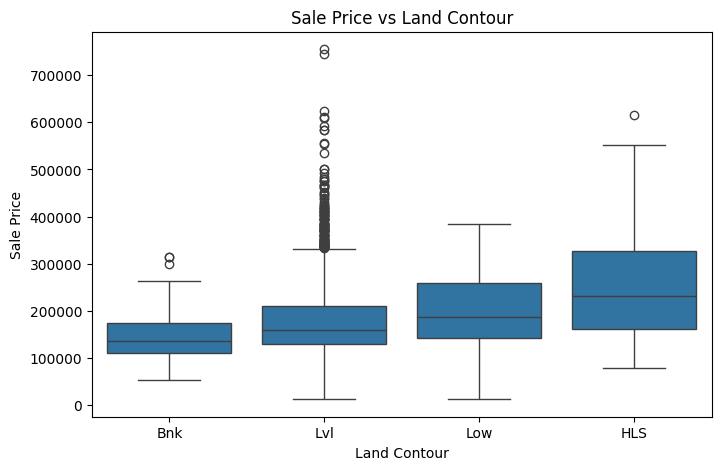

In [14]:
order = ['Bnk', 'Lvl', 'Low', 'HLS']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Land Contour', y='SalePrice', data=clean_df, order=order)

plt.xlabel('Land Contour')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Land Contour')
plt.show()

Land Contour	Mean SalePrice	Interpretation
Bnk	            144 k	        Poor (banked lot — lower elevation, less desirable)
Lvl	            179 k	        Average (level lot)
Low	            195 k	        Slightly better
HLS	            254 k	        Highest (hillside lot — often more premium view)

In [15]:
land_contour_mapping = {
    'Bnk': 1,
    'Lvl': 2,
    'Low': 3,
    'HLS': 4
}

df_copy['Land_Contour'] = df_copy['Land Contour'].map(land_contour_mapping)

df_copy.drop('Land Contour', axis=1, inplace=True)

print(df_copy['Land_Contour'].value_counts(dropna=False))

Land_Contour
2    2632
4     119
1     116
3      60
Name: count, dtype: int64


In [16]:
print(df_copy['Utilities'].value_counts())
print(df_copy.groupby('Utilities')['SalePrice'].mean().sort_values(ascending=False))

Utilities
AllPub    2924
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
Utilities
AllPub    180879.336867
NoSeWa    137500.000000
NoSewr     86312.500000
Name: SalePrice, dtype: float64


Only 3 rows have a different value to AllPub so by keeping this feature we are kepping noise in our data, so we will drop it.

In [17]:
df_copy.drop('Utilities', axis=1, inplace=True)

In [18]:
print(df_copy['Lot Config'].value_counts())
print(df_copy.groupby('Lot Config')['SalePrice'].mean().sort_values(ascending=False))

Lot Config
Inside     2137
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64
Lot Config
CulDSac    225531.872222
FR3        196635.857143
Corner     179956.937378
Inside     177395.519888
FR2        174122.894118
Name: SalePrice, dtype: float64


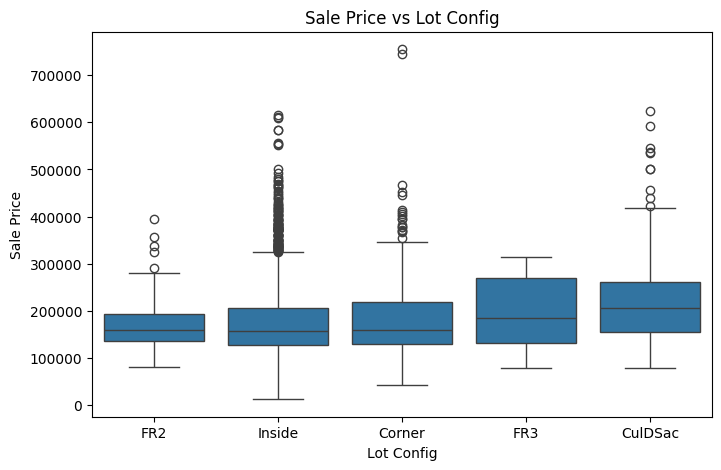

In [19]:
order = ['FR2', 'Inside', 'Corner',  'FR3', 'CulDSac']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Lot Config', y='SalePrice', data=clean_df, order=order)
plt.xlabel('Lot Config')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Lot Config')
plt.show()

The Lot Config feature describes the lot’s layout relative to surrounding properties. Since it contains multiple unordered categories (Inside, Corner, CulDSac, FR2, FR3) and is strongly imbalanced—most properties are Inside—ordinal encoding would incorrectly imply a ranking between categories. To avoid introducing artificial order and bias, one-hot encoding was used instead. This approach preserves all category information without imposing hierarchy, allowing the model to learn category-specific effects directly.

In [20]:
lot_config_dummies = pd.get_dummies(df_copy['Lot Config'], prefix='LotConfig')

df_copy = pd.concat([df_copy, lot_config_dummies], axis=1)
df_copy.drop('Lot Config', axis=1, inplace=True)

In [21]:
for col in [c for c in df_copy.columns if 'LotConfig' in c]:
    print(f"\n{col} value counts:")
    print(df_copy[col].value_counts())


LotConfig_Corner value counts:
LotConfig_Corner
False    2416
True      511
Name: count, dtype: int64

LotConfig_CulDSac value counts:
LotConfig_CulDSac
False    2747
True      180
Name: count, dtype: int64

LotConfig_FR2 value counts:
LotConfig_FR2
False    2842
True       85
Name: count, dtype: int64

LotConfig_FR3 value counts:
LotConfig_FR3
False    2913
True       14
Name: count, dtype: int64

LotConfig_Inside value counts:
LotConfig_Inside
True     2137
False     790
Name: count, dtype: int64


In [22]:
print(df_copy['Land Slope'].value_counts())
print(df_copy.groupby('Land Slope')['SalePrice'].mean().sort_values(ascending=False))

Land Slope
Gtl    2786
Mod     125
Sev      16
Name: count, dtype: int64
Land Slope
Sev    207370.625000
Mod    204853.784000
Gtl    179568.073582
Name: SalePrice, dtype: float64


The Land Slope feature was one-hot encoded because its categories (Gtl, Mod, Sev) are not truly ordinal and the data is imbalanced. This avoids imposing a false numeric order and lets the model learn each slope type’s effect independently.

In [23]:
land_slope_dummies = pd.get_dummies(df_copy['Land Slope'], prefix='LandSlope')
df_copy = pd.concat([df_copy, land_slope_dummies], axis=1)
df_copy.drop('Land Slope', axis=1, inplace=True)

In [24]:
for col in [c for c in df_copy.columns if 'LandSlope' in c]:
    print(f"\n{col} value counts:")
    print(df_copy[col].value_counts())


LandSlope_Gtl value counts:
LandSlope_Gtl
True     2786
False     141
Name: count, dtype: int64

LandSlope_Mod value counts:
LandSlope_Mod
False    2802
True      125
Name: count, dtype: int64

LandSlope_Sev value counts:
LandSlope_Sev
False    2911
True       16
Name: count, dtype: int64


In [25]:
print(df_copy['Neighborhood'].value_counts())
print(df_copy.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False))

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64
Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246307.985915
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Blmngtn    196661.678571
Greens     193531.250000
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
Mitchel    162954.300885
NAmes      145097.349887
Blueste    143590.000000
NPkVill    140710.869565
Landmrk    137000.000000
Sawyer     136751.152318
SWI

In [26]:
# Building Type vs Neighborhood
pd.crosstab(clean_df['Neighborhood'], clean_df['Bldg Type'], normalize='index').round(2)


Bldg Type,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
Neighborhood,,,,,
Blmngtn,0.11,0.00,0.00,0.00,0.89
Blueste,0.00,0.00,0.00,0.50,0.50
BrDale,0.00,0.00,0.00,0.80,0.20
BrkSide,0.98,0.02,0.00,0.00,0.00
ClearCr,0.98,0.00,0.00,0.02,0.00
CollgCr,0.95,0.00,0.00,0.00,0.05
Crawfor,0.84,0.02,0.04,0.00,0.10
Edwards,0.81,0.03,0.09,0.02,0.05
Gilbert,0.99,0.01,0.00,0.00,0.00


In [27]:
# House Style vs Neighborhood
pd.crosstab(clean_df['Neighborhood'], clean_df['House Style'], normalize='index').round(2)


House Style,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
Neighborhood,,,,,,,,
Blmngtn,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Blueste,0.00,0.00,0.30,0.00,0.00,0.70,0.00,0.00
BrDale,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
BrkSide,0.52,0.07,0.30,0.00,0.02,0.09,0.00,0.00
ClearCr,0.18,0.00,0.50,0.00,0.00,0.23,0.00,0.09
CollgCr,0.00,0.00,0.59,0.00,0.00,0.37,0.02,0.02
Crawfor,0.20,0.01,0.40,0.01,0.04,0.32,0.00,0.02
Edwards,0.22,0.00,0.52,0.00,0.01,0.12,0.07,0.06
Gilbert,0.01,0.00,0.16,0.00,0.00,0.72,0.00,0.12


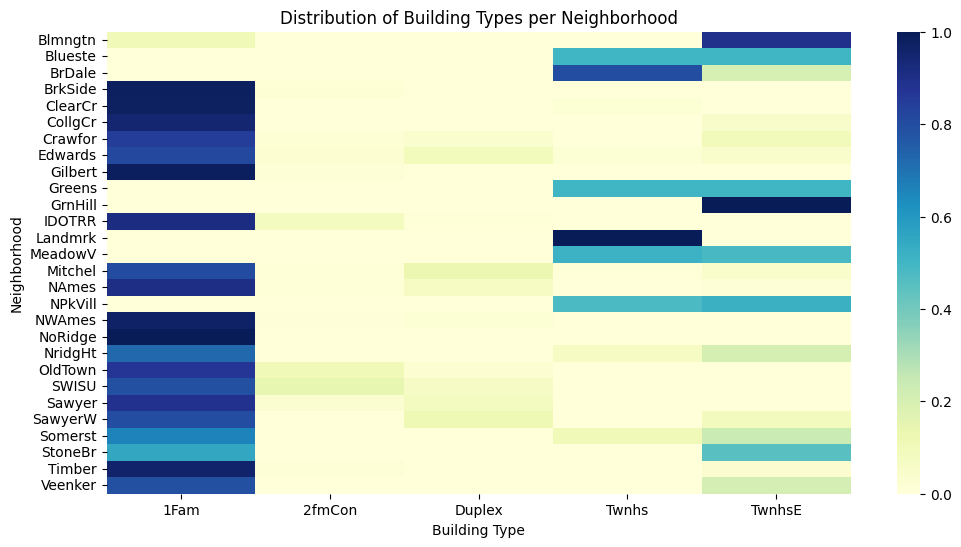

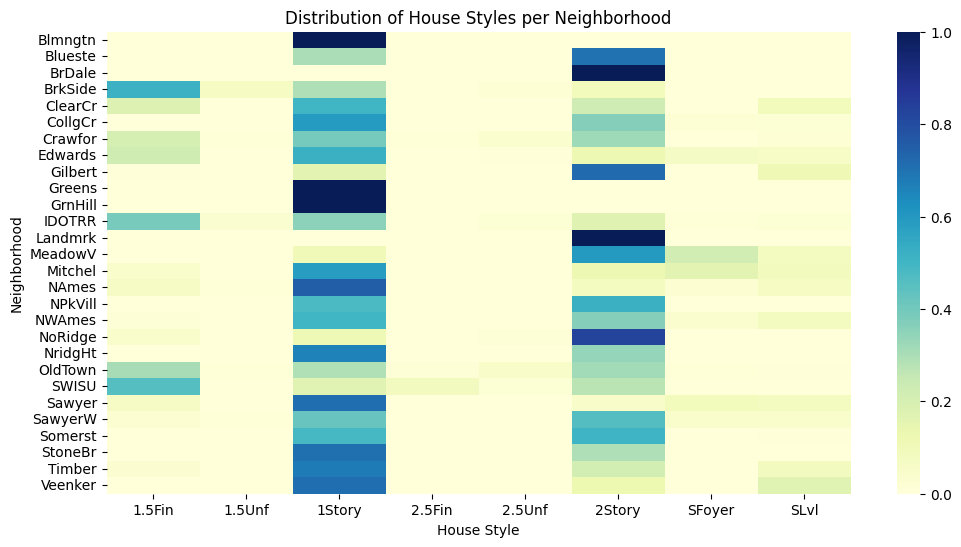

In [28]:
bldg_heatmap = pd.crosstab(clean_df['Neighborhood'], clean_df['Bldg Type'], normalize='index')
plt.figure(figsize=(12,6))
sns.heatmap(bldg_heatmap, cmap='YlGnBu')
plt.title('Distribution of Building Types per Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Building Type')
plt.show()

style_heatmap = pd.crosstab(clean_df['Neighborhood'], clean_df['House Style'], normalize='index')
plt.figure(figsize=(12,6))
sns.heatmap(style_heatmap, cmap='YlGnBu')
plt.title('Distribution of House Styles per Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('House Style')
plt.show()

In [29]:
df_copy['Neigh_Bldg_Style'] = (
    df_copy['Neighborhood'] + '_' + 
    df_copy['Bldg Type'] + '_' + 
    df_copy['House Style']
)
combo_price = (
    df_copy.groupby('Neigh_Bldg_Style')['SalePrice']
    .mean()
    .sort_values(ascending=False)
)
combo_price


Neigh_Bldg_Style
StoneBr_1Fam_2Story      422282.923077
Edwards_1Fam_2.5Unf      415000.000000
StoneBr_1Fam_1Story      381707.400000
NridgHt_1Fam_1Story      356027.926471
NoRidge_1Fam_1.5Fin      355833.333333
                             ...      
MeadowV_Twnhs_2Story      84915.555556
IDOTRR_1Fam_1Story        83203.312500
MeadowV_TwnhsE_SFoyer     77750.000000
SawyerW_1Fam_1.5Unf       76000.000000
IDOTRR_1Fam_SFoyer        70000.000000
Name: SalePrice, Length: 192, dtype: float64

In [30]:
price_map = df_copy.groupby('Neigh_Bldg_Style')['SalePrice'].median()
df_copy['Combo_PriceMean'] = df_copy['Neigh_Bldg_Style'].map(price_map)

df_copy[['Combo_PriceMean', 'SalePrice']].corr()


,Combo_PriceMean,SalePrice
Combo_PriceMean,1.000000,0.822309
SalePrice,0.822309,1.000000


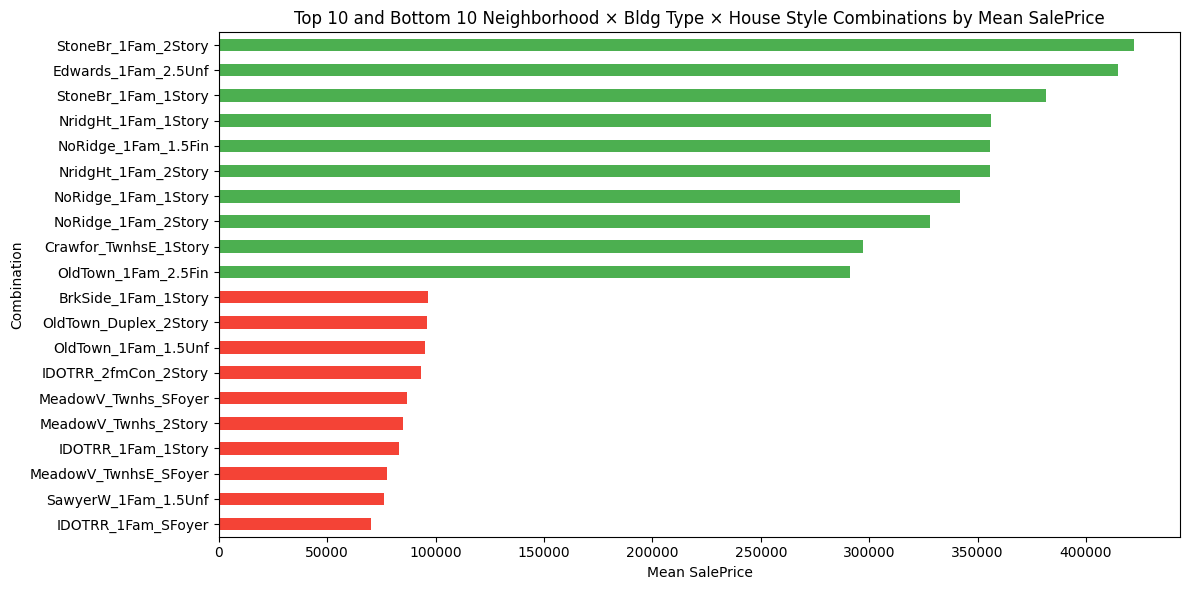

In [31]:
top10 = combo_price.head(10)
bottom10 = combo_price.tail(10)

combo_plot = pd.concat([top10, bottom10])

plt.figure(figsize=(12, 6))
combo_plot.plot(kind='barh', color=['#4CAF50' if i < 10 else '#F44336' for i in range(len(combo_plot))])
plt.title('Top 10 and Bottom 10 Neighborhood × Bldg Type × House Style Combinations by Mean SalePrice')
plt.xlabel('Mean SalePrice')
plt.ylabel('Combination')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [32]:
# move the new feature next to the related categorical ones
cols = list(df_copy.columns)
cols.insert(cols.index('House Style') + 1, cols.pop(cols.index('Combo_PriceMean')))
df_copy = df_copy[cols]


We created a new feature combining Neighborhood, Building Type, and House Style to capture interaction effects that influence sale price.

Certain combinations of location and house type consistently sell for higher or lower prices.

Instead of one-hot encoding hundreds of unique combinations, we summarize each combination by its median SalePrice, creating a single numeric feature.

This preserves the predictive signal while keeping the dataset compact.

Benefit: Houses in the same “combo group” are represented by their typical market value, improving correlation with SalePrice and reducing categorical complexity.

We still have to handle the 3 original features.

In [33]:
print(df_copy['Neighborhood'].value_counts())
print(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False))

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64
Neighborhood
StoneBr    319000.0
NridgHt    317750.0
NoRidge    302000.0
GrnHill    280000.0
Veenker    250250.0
Timber     231713.0
Somerst    225500.0
Crawfor    200624.0
CollgCr    200000.0
Greens     198000.0
ClearCr    197500.0
Blmngtn    191500.0
Gilbert    183000.0
NWAmes     181000.0
SawyerW    180000.0
Mitchel    153500.0
NPkVill    143750.0
NAmes      140000.0
Landmrk    137000.0
SWISU      136200.0
Sawyer     135000.0
Blueste    130500.0
BrkSide    126750.0
Edwards    125000.0
OldTown    119900.0
IDOTRR     106500.0
BrDale  

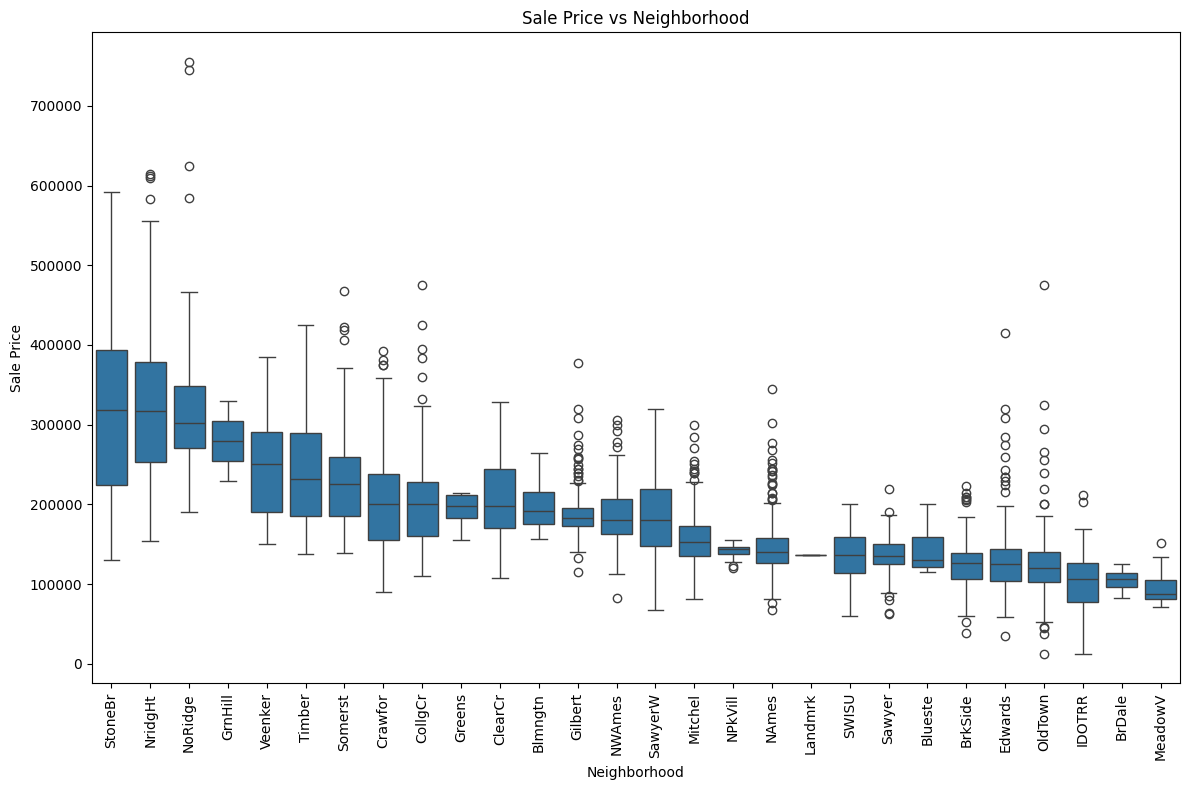

In [34]:
neigh_order = df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_copy, order=neigh_order)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
neigh_median_map = df_copy.groupby('Neighborhood')['SalePrice'].median()

df_copy['Neighborhood_MedianPrice'] = df_copy['Neighborhood'].map(neigh_median_map)

df_copy[['Neighborhood', 'Neighborhood_MedianPrice', 'SalePrice']].head(10)


,Neighborhood,Neighborhood_MedianPrice,SalePrice
0,NAmes,140000.0,215000
1,NAmes,140000.0,105000
2,NAmes,140000.0,172000
3,NAmes,140000.0,244000
4,Gilbert,183000.0,189900
5,Gilbert,183000.0,195500
6,StoneBr,319000.0,213500
7,StoneBr,319000.0,191500
8,StoneBr,319000.0,236500
9,Gilbert,183000.0,189000


In [36]:
df_copy.drop('Neighborhood', axis=1, inplace=True)

In [37]:
df_copy.drop('Neigh_Bldg_Style', axis=1, inplace=True)

In [38]:
cols = df_copy.columns.tolist()
cols.insert(cols.index('Lot Area') + 1, cols.pop(cols.index('Neighborhood_MedianPrice')))
df_copy = df_copy[cols]

We replaced the categorical Neighborhood feature with a numeric representation based on the median SalePrice per neighborhood.

Housing prices are often skewed, so the median is more robust to outliers than the mean.

This transformation allows the model to directly use location information in a numeric form, capturing the typical value of houses in each neighborhood.

After creating this new feature, the original Neighborhood column can be dropped to avoid redundancy.

In [39]:
print(df_copy['Bldg Type'].value_counts())
print(df_copy.groupby('Bldg Type')['SalePrice'].median().sort_values(ascending=False))

Bldg Type
1Fam      2422
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: count, dtype: int64
Bldg Type
TwnhsE    180000.0
1Fam      165000.0
Duplex    136905.0
Twnhs     130000.0
2fmCon    122250.0
Name: SalePrice, dtype: float64


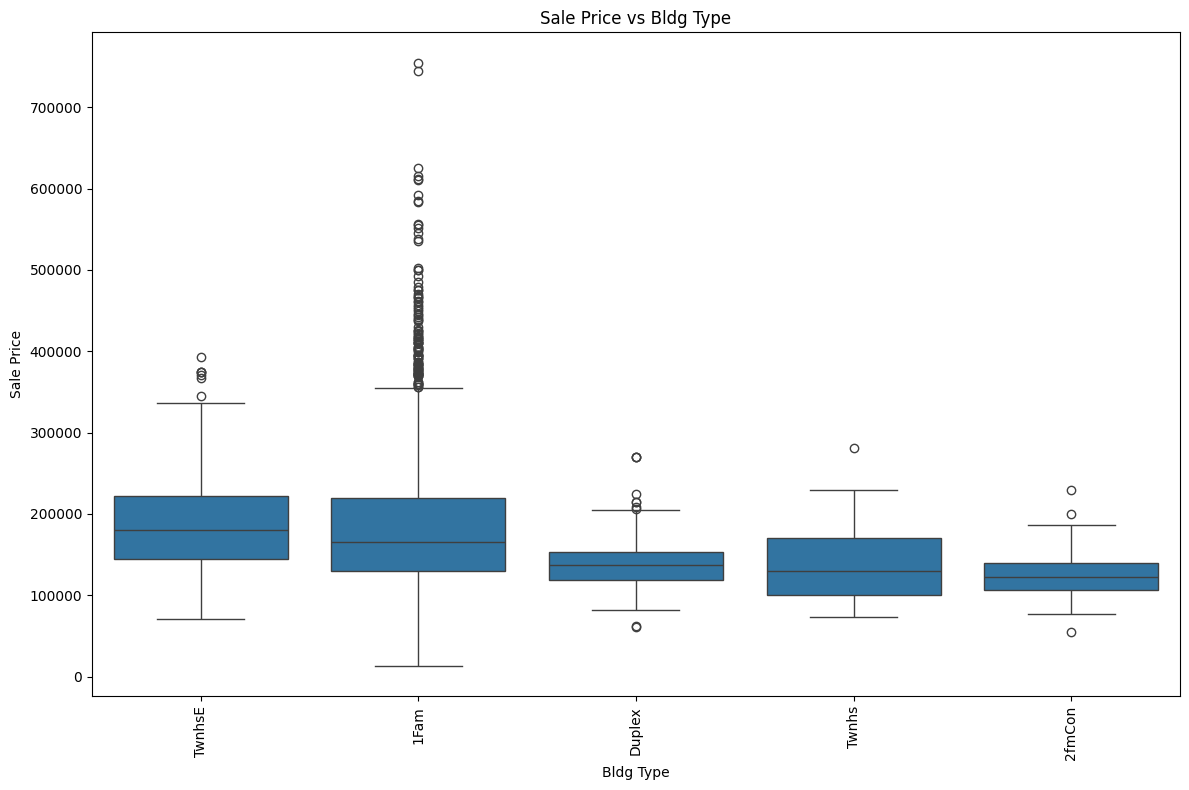

In [40]:
type_order = df_copy.groupby('Bldg Type')['SalePrice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Bldg Type', y='SalePrice', data=df_copy, order=type_order)
plt.xlabel('Bldg Type')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Bldg Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
bldg_type_price_map = df_copy.groupby('Bldg Type')['SalePrice'].median()

df_copy['BldgType_MedianPrice'] = df_copy['Bldg Type'].map(bldg_type_price_map)

df_copy.drop('Bldg Type', axis=1, inplace=True)


In [42]:
cols = df_copy.columns.tolist()
cols.insert(cols.index('Lot Area') + 1, cols.pop(cols.index('BldgType_MedianPrice')))
df_copy = df_copy[cols]

Converted Bldg Type to a numeric feature by replacing each category with its median SalePrice, capturing its typical price effect and allowing direct use in models.

In [43]:
print(df_copy['House Style'].value_counts())
print(df_copy.groupby('House Style')['SalePrice'].median().sort_values(ascending=False))

House Style
1Story    1478
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64
House Style
2.5Fin    194000.0
2Story    189000.0
SLvl      165000.0
2.5Unf    160950.0
1Story    155000.0
SFoyer    143000.0
1.5Fin    129675.0
1.5Unf    113000.0
Name: SalePrice, dtype: float64


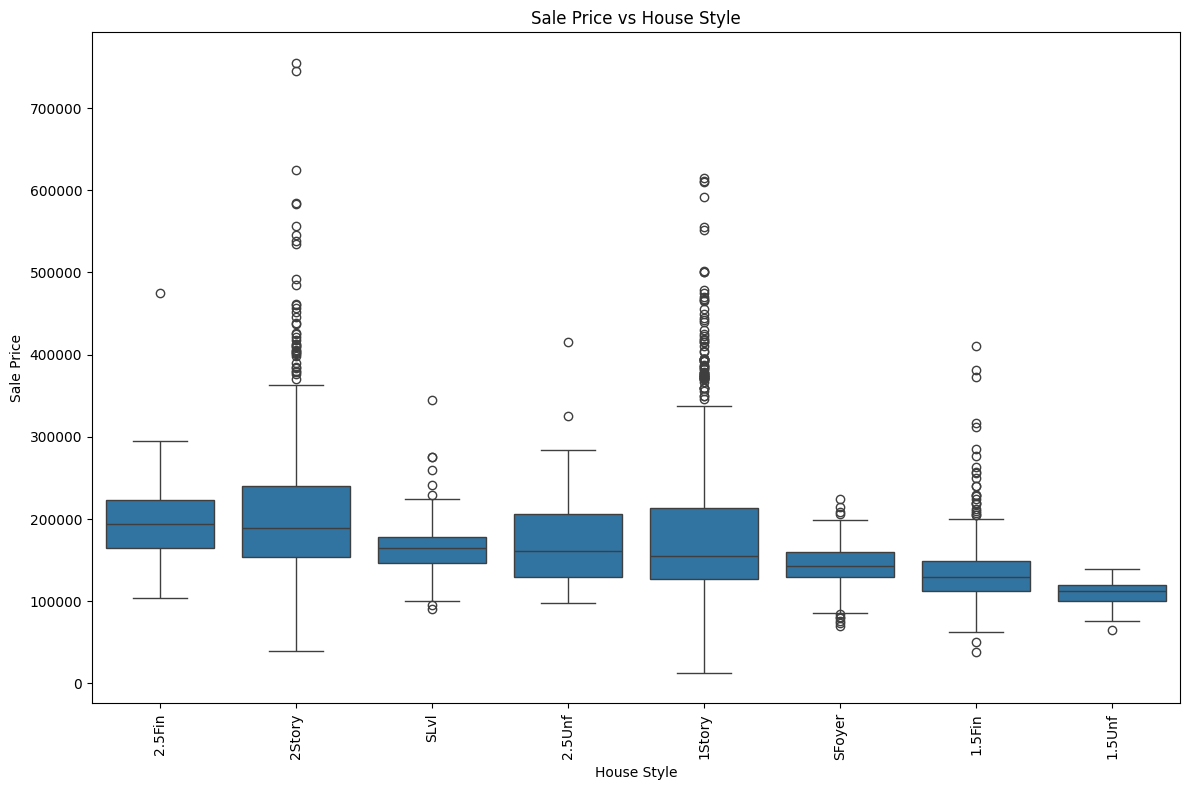

In [44]:
type_order = df_copy.groupby('House Style')['SalePrice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='House Style', y='SalePrice', data=df_copy, order=type_order)
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.title('Sale Price vs House Style')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
house_style_price = df_copy.groupby('House Style')['SalePrice'].median()
df_copy['HouseStyle_MedianPrice'] = df_copy['House Style'].map(house_style_price)

df_copy.drop('House Style', axis=1, inplace=True)

cols = df_copy.columns.tolist()
cols.insert(cols.index('Lot Area') + 1, cols.pop(cols.index('HouseStyle_MedianPrice')))
df_copy = df_copy[cols]

Converted House Style to a numeric feature by replacing each category with its median SalePrice, reflecting the typical price impact of different dwelling styles.

In [46]:
print(df_copy['Condition 1'].value_counts())
print(df_copy.groupby('Condition 1')['SalePrice'].mean().sort_values(ascending=False))

Condition 1
Norm      2519
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64
Condition 1
PosA      253917.500000
PosN      245720.410256
RRNn      201027.777778
Norm      184058.848353
RRAn      181413.000000
Feedr     142605.615854
RRNe      142558.333333
RRAe      138710.714286
Artery    129229.891304
Name: SalePrice, dtype: float64


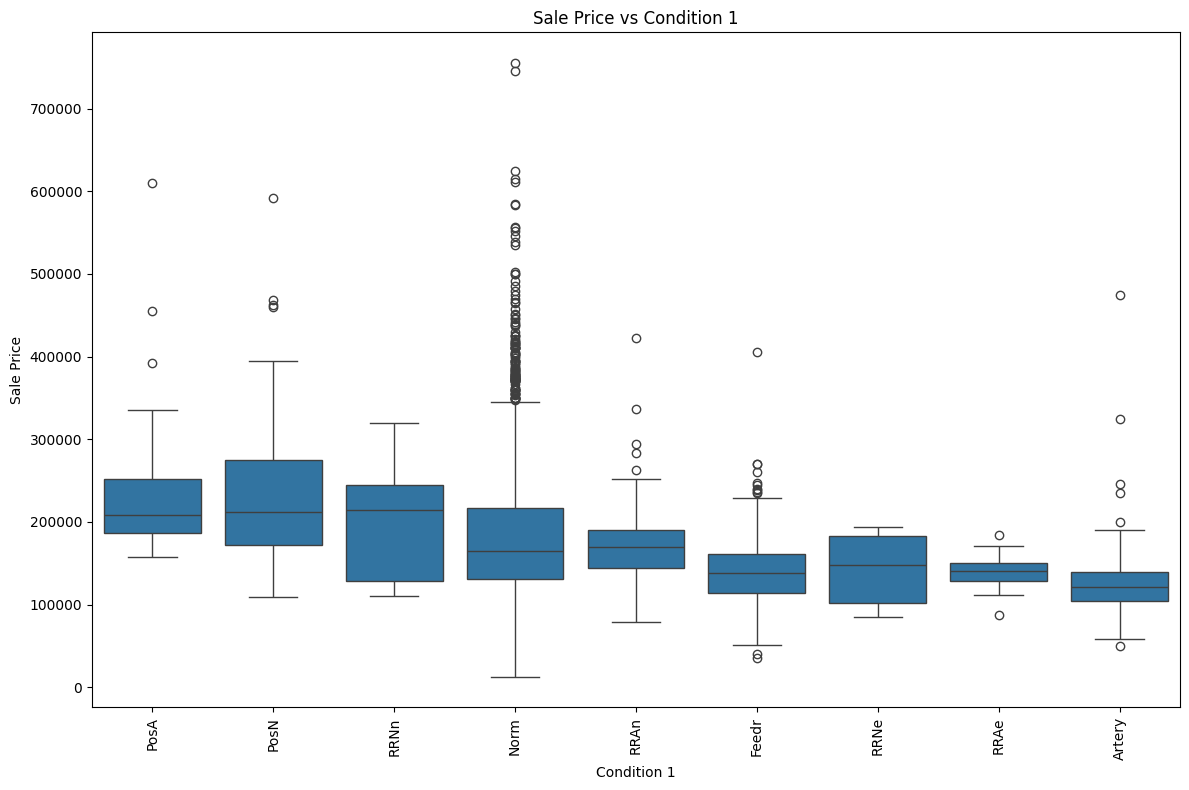

In [47]:
cond1_order = df_copy.groupby('Condition 1')['SalePrice'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Condition 1', y='SalePrice', data=df_copy, order=cond1_order)
plt.xlabel('Condition 1')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Condition 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
good = ['PosA', 'PosN', 'RRNn']
bad = ['Feedr', 'RRNe', 'RRAe', 'Artery']
neutral = ['Norm', 'RRAn']

df_copy['GoodCond1'] = df_copy['Condition 1'].apply(lambda x: 1 if x in good else 0)
df_copy['BadCond1'] = df_copy['Condition 1'].apply(lambda x: 1 if x in bad else 0)


We transform the Condition 1 feature into two binary indicators to capture its effect on sale price while reducing categorical complexity:

GoodCond1 → 1 if the location category historically shows a higher mean sale price (PosA, PosN, RRNn), else 0.

BadCond1 → 1 if the category has a lower mean sale price (Feedr, RRNe, RRAe, Artery), else 0.

Neutral categories (Norm, RRAn) are set to 0 for both features.

In [49]:
# Sanity check: ensure all rows are accounted for
print(df_copy[['Condition 1', 'GoodCond1', 'BadCond1']].head(10))
print(df_copy[['GoodCond1', 'BadCond1']].sum())

  Condition 1  GoodCond1  BadCond1
0        Norm          0         0
1       Feedr          0         1
2        Norm          0         0
3        Norm          0         0
4        Norm          0         0
5        Norm          0         0
6        Norm          0         0
7        Norm          0         0
8        Norm          0         0
9        Norm          0         0
GoodCond1     68
BadCond1     290
dtype: int64


In [50]:
df_copy.drop('Condition 1', axis=1, inplace=True)

In [51]:
print(df_copy['Condition 2'].value_counts())
print(df_copy.groupby('Condition 2')['SalePrice'].mean().sort_values(ascending=False))


Condition 2
Norm      2897
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: count, dtype: int64
Condition 2
PosA      445500.000000
PosN      342937.500000
RRAe      190000.000000
Norm      180619.261650
RRAn      136905.000000
Feedr     129069.230769
Artery    119050.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64


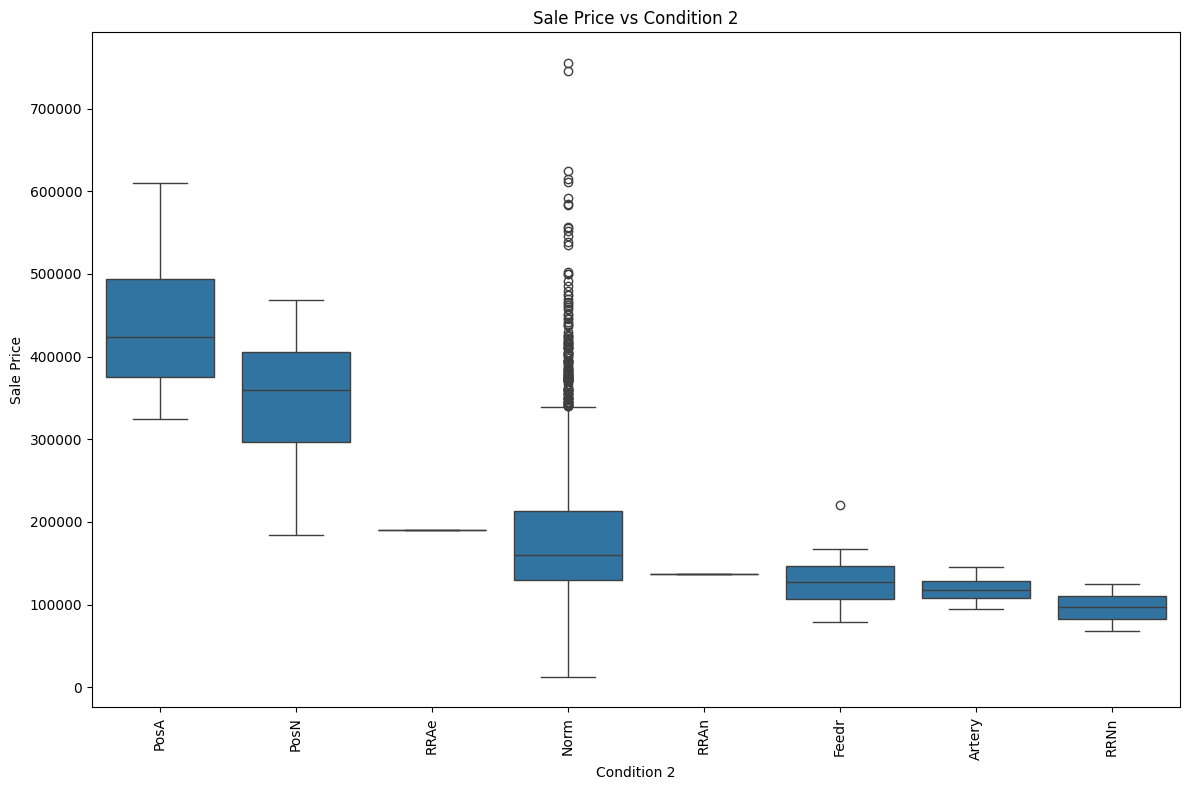

In [52]:
cond2_order = df_copy.groupby('Condition 2')['SalePrice'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
sns.boxplot(x='Condition 2', y='SalePrice', data=df_copy, order=cond2_order)
plt.xlabel('Condition 2')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Condition 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Other than the norm values Cond 2 is very sparsly populated, so dropping it is a safe option for our case.

In [53]:
df_copy.drop('Condition 2', axis=1, inplace=True)

In [54]:
print(df_copy['Roof Style'].value_counts())
print(df_copy.groupby('Roof Style')['SalePrice'].mean().sort_values(ascending=False))

Roof Style
Gable      2321
Hip         549
Gambrel      22
Flat         20
Mansard      11
Shed          4
Name: count, dtype: int64
Roof Style
Hip        226693.577413
Shed       221500.000000
Flat       184798.500000
Gable      170311.854373
Mansard    166225.363636
Gambrel    138284.954545
Name: SalePrice, dtype: float64


In [55]:
print(df_copy['Roof Matl'].value_counts())
print(df_copy.groupby('Roof Matl')['SalePrice'].mean().sort_values(ascending=False))

Roof Matl
CompShg    2884
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: count, dtype: int64
Roof Matl
WdShngl    374357.142857
Membran    241500.000000
WdShake    238444.444444
Tar&Grv    185140.608696
CompShg    180117.223301
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64


Some categories in Roof Style and Roof Material occur very infrequently (e.g., Shed, Mansard, Membran). Keeping them as separate features can introduce noise and lead to overfitting, as the model has very little data to learn from these categories.

To address this, we group all rare categories into an “Other” category. This preserves the meaningful signal from the dominant categories while reducing noise from sparse ones. This approach is standard in feature engineering for categorical variables, especially when preparing data for tree-based or linear models.

In [56]:
def simplify_roof_style(style):
    if style in ['Gable', 'Hip']:
        return style
    else:
        return 'Other'

df_copy['Roof_Style_Simp'] = df_copy['Roof Style'].apply(simplify_roof_style)


In [57]:
def simplify_roof_matl(matl):
    if matl == 'CompShg':
        return 'CompShg'
    else:
        return 'Other'

df_copy['Roof_Matl_Simp'] = df_copy['Roof Matl'].apply(simplify_roof_matl)

In [58]:
df_copy.drop('Roof Style', axis=1, inplace=True)
df_copy.drop('Roof Matl', axis=1, inplace=True)

In [59]:
df_copy = pd.get_dummies(df_copy, columns=['Roof_Style_Simp'], prefix='RoofStyle')
df_copy = pd.get_dummies(df_copy, columns=['Roof_Matl_Simp'], prefix='RoofMatl')

In [60]:
print("Roof Style counts after encoding:")
print(df_copy[[col for col in df_copy.columns if 'RoofStyle_' in col]].sum())

print("\nRoof Matl counts after encoding:")
print(df_copy[[col for col in df_copy.columns if 'RoofMatl_' in col]].sum())

print("\nCheck if original columns exist:")
print('Roof Style' in df_copy.columns, 'Roof Matl' in df_copy.columns)


Roof Style counts after encoding:
RoofStyle_Gable    2321
RoofStyle_Hip       549
RoofStyle_Other      57
dtype: int64

Roof Matl counts after encoding:
RoofMatl_CompShg    2884
RoofMatl_Other        43
dtype: int64

Check if original columns exist:
False False


In [61]:
print(df_copy['Foundation'].value_counts())
print(df_copy.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=False))

Foundation
PConc     1308
CBlock    1243
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64
Foundation
PConc     227071.769113
Wood      180900.000000
Stone     149786.818182
CBlock    148339.088496
BrkTil    128107.276527
Slab      110457.693878
Name: SalePrice, dtype: float64


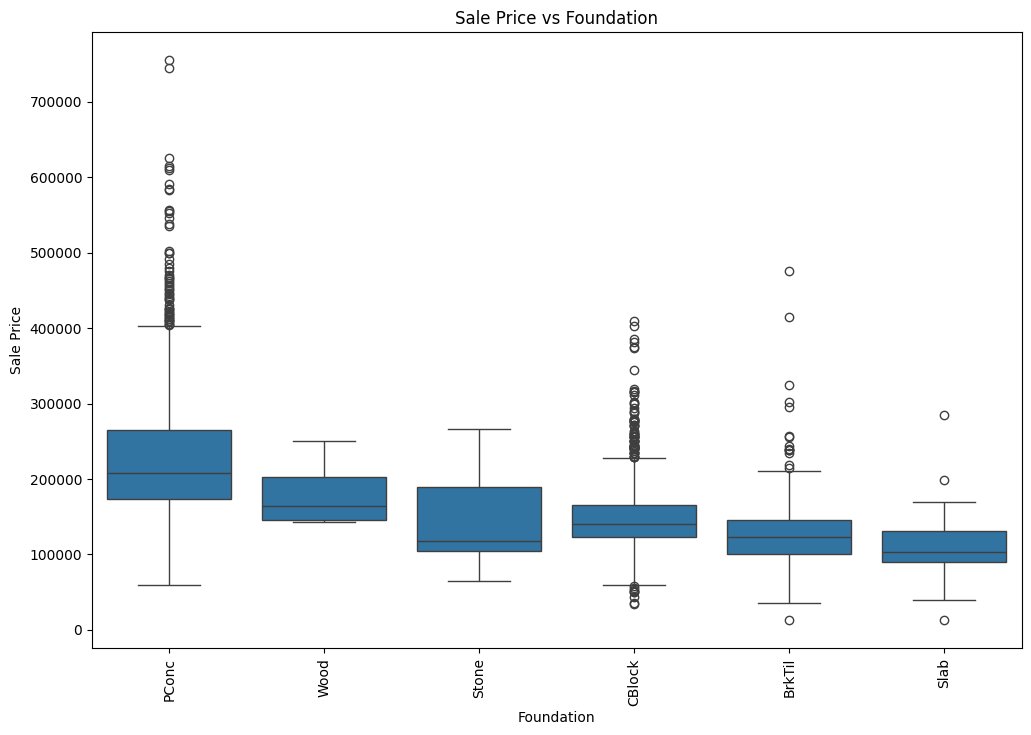

In [62]:
found_order = df_copy.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
sns.boxplot(x='Foundation', y='SalePrice', data=df_copy, order=found_order)
plt.xlabel('Foundation')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Foundation')
plt.xticks(rotation=90)
plt.show()

As for the roof features the bottom 4 values by value count are much less then the first 2 values, so we will join them in a 'Other value' and then one-hot encode the resulting row.

In [63]:
def simplify_foundation(fnd):
    if fnd in ['PConc', 'CBlock']:
        return fnd
    else:
        return 'Other'

df_copy['Foundation_Simp'] = df_copy['Foundation'].apply(simplify_foundation)

df_copy = pd.get_dummies(df_copy, columns=['Foundation_Simp'], prefix='Foundation')

df_copy.drop(['Foundation'], axis=1, inplace=True)


In [64]:
print(df_copy[[col for col in df_copy.columns if 'Foundation' in col]].sum())

Foundation_CBlock    1243
Foundation_Other      376
Foundation_PConc     1308
dtype: int64


In [65]:
print(df_copy['Central Air'].value_counts())
print(df_copy.groupby('Central Air')['SalePrice'].mean().sort_values(ascending=False))

Central Air
Y    2732
N     195
Name: count, dtype: int64
Central Air
Y    186424.147877
N    102002.738462
Name: SalePrice, dtype: float64


For this feature we just map y to 1 and n to 0.

In [66]:
df_copy['Central_Air'] = (df_copy['Central Air'] == 'Y').astype(int)

df_copy.drop(['Central Air'], axis=1, inplace=True)

In [67]:
print(df_copy['Kitchen Qual'].value_counts())
print(df_copy.groupby('Kitchen Qual')['SalePrice'].mean().sort_values(ascending=False))

Kitchen Qual
TA    1493
Gd    1160
Ex     203
Fa      70
Po       1
Name: count, dtype: int64
Kitchen Qual
Ex    338440.467980
Gd    210835.582759
TA    139589.833891
Po    107500.000000
Fa    105907.042857
Name: SalePrice, dtype: float64


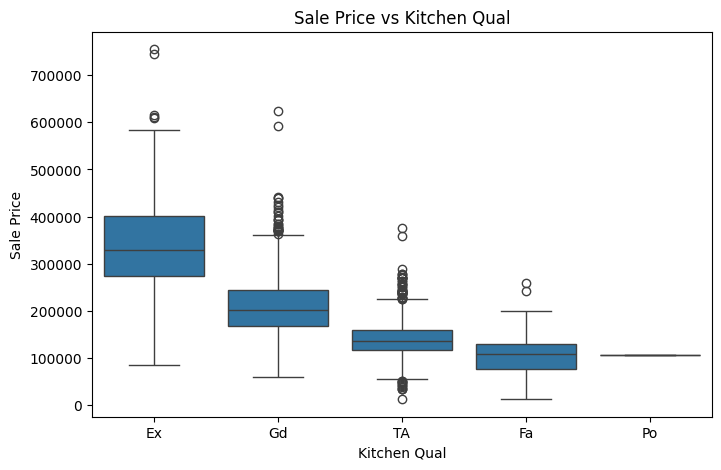

In [68]:
kitchen_qual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=df_copy, order=kitchen_qual_order)
plt.xlabel('Kitchen Qual')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Kitchen Qual')
plt.show()

For this feature there is a clear relation between the quality and the sale price so we will map the values to ints.

In [69]:
kitchen_qual_mapping = {
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

df_copy['Kitchen_Qual'] = df_copy['Kitchen Qual'].map(kitchen_qual_mapping)

df_copy.drop(['Kitchen Qual'], axis=1, inplace=True)


In [70]:
print(df_copy['Paved Drive'].value_counts())
print(df_copy.groupby('Paved Drive')['SalePrice'].mean().sort_values(ascending=False))

Paved Drive
Y    2649
N     216
P      62
Name: count, dtype: int64
Paved Drive
Y    187876.318233
P    134782.322581
N    107224.236111
Name: SalePrice, dtype: float64


In [71]:
df_copy['PavedDrive_Full'] = (df_copy['Paved Drive'] == 'Y').astype(int)
df_copy['PavedDrive_Partial'] = (df_copy['Paved Drive'] == 'P').astype(int)

df_copy.drop(['Paved Drive'], axis=1, inplace=True)


In [72]:
print(df_copy[[col for col in df_copy.columns if 'PavedDrive' in col]].sum())

PavedDrive_Full       2649
PavedDrive_Partial      62
dtype: int64


In [73]:
print(df_copy['Heating'].value_counts())
print(df_copy.groupby('Heating')['SalePrice'].mean().sort_values(ascending=False))

Heating
GasA     2882
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64
Heating
GasA     181598.805690
GasW     159009.185185
OthW     125750.000000
Grav      83711.111111
Wall      77150.000000
Floor     72500.000000
Name: SalePrice, dtype: float64


In [74]:
print(df_copy['Heating QC'].value_counts())
print(df_copy.groupby('Heating QC')['SalePrice'].mean().sort_values(ascending=False))

Heating QC
Ex    1493
TA     863
Gd     476
Fa      92
Po       3
Name: count, dtype: int64
Heating QC
Ex    216354.262559
Gd    156855.056723
TA    139053.212051
Fa    122949.597826
Po     69033.333333
Name: SalePrice, dtype: float64


The heating QC feature has a easy to observe direct relation to the sale price so we will map its values to integers, the Heating feature requaiers more analysis.

In [75]:
heating_qual_mapping = {
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}
df_copy['Heating_QC'] = df_copy['Heating QC'].map(heating_qual_mapping)

df_copy.drop(['Heating QC'], axis=1, inplace=True)

In [76]:
print(df_copy['Heating_QC'].value_counts())

Heating_QC
5    1493
3     863
4     476
2      92
1       3
Name: count, dtype: int64


The majority of the values for Heating are GasA, which also corelate to a segnificantly higher mean sale price, so we will replace this coulmn with a binary Heating_GasA feature.

In [77]:
df_copy['Heating_GasA'] = (df_copy['Heating'] == 'GasA').astype(int)

df_copy.drop('Heating', axis=1, inplace=True)

In [78]:
df_copy['Heating_GasA'].value_counts(dropna=False)

Heating_GasA
1    2882
0      45
Name: count, dtype: int64

In [79]:
print(df_copy['Exter Qual'].value_counts())
print(df_copy.groupby('Exter Qual')['SalePrice'].mean().sort_values(ascending=False))

Exter Qual
TA    1798
Gd     988
Ex     106
Fa      35
Name: count, dtype: int64
Exter Qual
Ex    379749.452830
Gd    230719.396761
TA    143409.215239
Fa     89923.742857
Name: SalePrice, dtype: float64


In [80]:
print(df_copy['Exter Cond'].value_counts())
print(df_copy.groupby('Exter Cond')['SalePrice'].mean().sort_values(ascending=False))

Exter Cond
TA    2546
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64
Exter Cond
Ex    217699.750000
TA    184429.789081
Gd    165803.762542
Fa    107563.298507
Po     82866.666667
Name: SalePrice, dtype: float64


As for other cond or qual features we will map the values of these 2 to ints.

In [81]:
exter_qual_mapping = {
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}
df_copy['Exter_Qual'] = df_copy['Exter Qual'].map(exter_qual_mapping)

exter_cond_mapping = {
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}
df_copy['Exter_Cond'] = df_copy['Exter Cond'].map(exter_cond_mapping)

df_copy.drop(['Exter Qual', 'Exter Cond'], axis=1, inplace=True)
print(df_copy['Exter_Qual'].value_counts())
print(df_copy['Exter_Cond'].value_counts())

Exter_Qual
2    1798
3     988
4     106
1      35
Name: count, dtype: int64
Exter_Cond
3    2546
4     299
2      67
5      12
1       3
Name: count, dtype: int64


In [82]:
print(df_copy['Exterior 1st'].value_counts())
print(df_copy.groupby('Exterior 1st')['SalePrice'].mean().sort_values(ascending=False))

Exterior 1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     220
CemntBd     125
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
PreCast       1
ImStucc       1
Name: count, dtype: int64
Exterior 1st
ImStucc    262000.000000
PreCast    260000.000000
Stone      258500.000000
CemntBd    234740.048000
VinylSd    217134.288780
BrkFace    187803.034091
Plywood    168388.254545
HdBoard    160872.957014
MetalSd    153775.160000
WdShing    152767.982143
Stucco     149760.465116
Wd Sdng    146966.119048
BrkComm    137500.000000
AsbShng    101501.136364
CBlock      93250.000000
AsphShn     91187.500000
Name: SalePrice, dtype: float64


In [83]:
print(df_copy['Exterior 2nd'].value_counts())
print(df_copy.groupby('Exterior 2nd')['SalePrice'].mean().sort_values(ascending=False))

Exterior 2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     273
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: count, dtype: int64
Exterior 2nd
Other      319000.000000
PreCast    260000.000000
ImStucc    257946.666667
CmentBd    233624.048000
VinylSd    217077.082840
BrkFace    188160.638298
Plywood    164323.194139
HdBoard    161738.701970
MetalSd    155553.293065
Wd Shng    154001.851852
Stucco     148587.659574
Wd Sdng    146944.337531
Stone      145420.666667
Brk Cmn    137536.363636
AsphShn    124093.750000
CBlock     114666.666667
AsbShng    105225.000000
Name: SalePrice, dtype: float64


These features had many low-frequency categories, such as Stone, PreCast, and AsphShn, which appear in fewer than 1% of rows.

To avoid over-fragmenting the model, we grouped all rare categories into a single "Other" category.

We then applied one-hot encoding to capture non-ordinal categorical differences (since “Vinyl” isn’t inherently greater or lesser than “Metal”).

This approach retains dominant materials like VinylSd, MetalSd, and HdBoard, while still preserving information about rare types in "Other".

In [84]:
main_exteriors = ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood','CemntBd','BrkFace']
main_exteriors2 = ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood','CmentBd','Wd Shng']

df_copy['Exterior1st_Simp'] = df_copy['Exterior 1st'].apply(
    lambda x: x if x in main_exteriors else 'Other'
)
df_copy['Exterior2nd_Simp'] = df_copy['Exterior 2nd'].apply(
    lambda x: x if x in main_exteriors2 else 'Other'
)

df_copy = pd.get_dummies(df_copy, columns=['Exterior1st_Simp', 'Exterior2nd_Simp'], drop_first=False)

df_copy.drop(['Exterior 1st', 'Exterior 2nd'], axis=1, inplace=True)

print(df_copy.filter(like='Exterior1st_').sum())
print(df_copy.filter(like='Exterior2nd_').sum())


Exterior1st_Simp_BrkFace      88
Exterior1st_Simp_CemntBd     125
Exterior1st_Simp_HdBoard     442
Exterior1st_Simp_MetalSd     450
Exterior1st_Simp_Other       157
Exterior1st_Simp_Plywood     220
Exterior1st_Simp_VinylSd    1025
Exterior1st_Simp_Wd Sdng     420
dtype: int64
Exterior2nd_Simp_CmentBd     125
Exterior2nd_Simp_HdBoard     406
Exterior2nd_Simp_MetalSd     447
Exterior2nd_Simp_Other       184
Exterior2nd_Simp_Plywood     273
Exterior2nd_Simp_VinylSd    1014
Exterior2nd_Simp_Wd Sdng     397
Exterior2nd_Simp_Wd Shng      81
dtype: int64


In [85]:
print(df_copy['Functional'].value_counts())
print(df_copy.groupby('Functional')['SalePrice'].median().sort_values(ascending=False))

Functional
Typ     2725
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: count, dtype: int64
Functional
Typ     164000.0
Min2    144200.0
Min1    141000.0
Maj1    137500.0
Mod     128500.0
Sev      95750.0
Maj2     85000.0
Sal      31550.0
Name: SalePrice, dtype: float64


We can group the differnt values in 'buckets' by the median sale price for each value to reduce the dimensionality of our data.

In [86]:
functional_map = {
    'Typ': 4,
    'Min2': 3, 'Min1': 3, 'Mod': 3, 'Maj1': 3,
    'Maj2': 2, 'Sev': 2,
    'Sal': 1
}

df_copy['Functional_Encoded'] = df_copy['Functional'].map(functional_map)

print(df_copy['Functional_Encoded'].value_counts(dropna=False))
print(df_copy[['Functional', 'Functional_Encoded']].head())


Functional_Encoded
4    2725
3     189
2      11
1       2
Name: count, dtype: int64
  Functional  Functional_Encoded
0        Typ                   4
1        Typ                   4
2        Typ                   4
3        Typ                   4
4        Typ                   4


In [87]:
df_copy.drop('Functional', axis=1, inplace=True)

In [88]:
print(df_copy['Sale Type'].value_counts())
print(df_copy.groupby('Sale Type')['SalePrice'].median().sort_values(ascending=False))

Sale Type
WD       2536
New       237
COD        86
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64
Sale Type
New      250580.0
Con      215200.0
CWD      160750.0
WD       157000.0
VWD      137000.0
COD      127750.0
ConLD    127500.0
ConLI    119000.0
Oth      116050.0
ConLw     92500.0
Name: SalePrice, dtype: float64


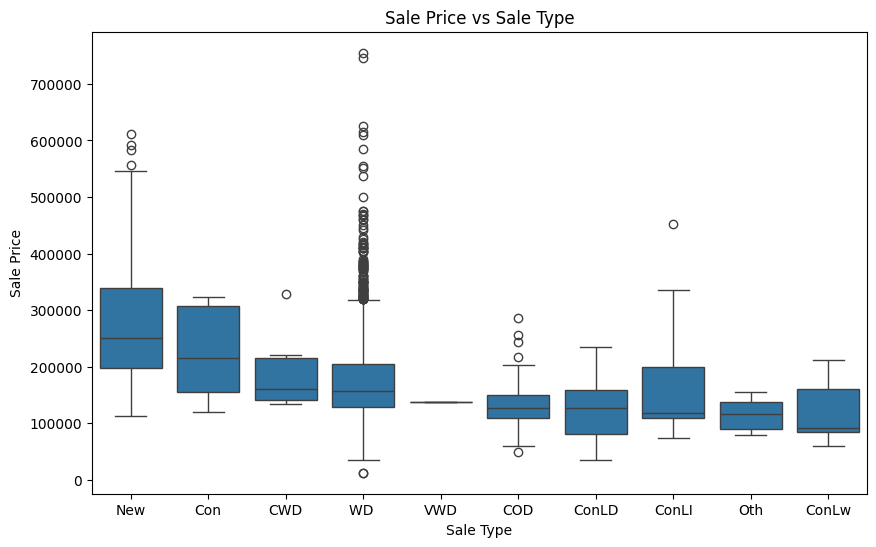

In [89]:
order = df_copy.groupby('Sale Type')['SalePrice'].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sale Type', y='SalePrice', data=df_copy, order=order)
plt.xlabel('Sale Type')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Sale Type')
plt.show()

To keep dimensionality low, categorys of similar median sale price will be grouped in binary bucket features

In [90]:
best_types = ['New', 'Con']
df_copy['SaleType_Best'] = df_copy['Sale Type'].apply(lambda x: 1 if x in best_types else 0)

In [91]:
print(df_copy['SaleType_Best'].value_counts())

SaleType_Best
0    2685
1     242
Name: count, dtype: int64


In [92]:
df_copy['Sale Type'] = df_copy['Sale Type'].str.strip().str.upper()
print(df_copy['Sale Type'].value_counts())

Sale Type
WD       2536
NEW       237
COD        86
CONLD      26
CWD        12
CONLI       9
CONLW       8
OTH         7
CON         5
VWD         1
Name: count, dtype: int64


In [93]:
good_types = ['CWD', 'WD']
df_copy['SaleType_Good'] = df_copy['Sale Type'].apply(lambda x: 1 if x in good_types else 0)

In [94]:
print(df_copy['SaleType_Good'].value_counts())

SaleType_Good
1    2548
0     379
Name: count, dtype: int64


In [95]:
average_types = ['VWD', 'COD', 'CONLD', 'CONLI', 'OTH']
df_copy['SaleType_Average'] = df_copy['Sale Type'].apply(lambda x: 1 if x in average_types else 0)

In [96]:
print(df_copy['SaleType_Average'].value_counts())

SaleType_Average
0    2798
1     129
Name: count, dtype: int64


In [97]:
low_types = ['CONLW']
df_copy['SaleType_Low'] = df_copy['Sale Type'].apply(lambda x: 1 if x in low_types else 0)

In [98]:
print(df_copy['SaleType_Low'].value_counts())

SaleType_Low
0    2919
1       8
Name: count, dtype: int64


In [99]:
df_copy.drop('Sale Type', axis=1, inplace=True)

In [100]:
[x for x in df_copy.columns if "SaleType" in x]

['SaleType_Best', 'SaleType_Good', 'SaleType_Average', 'SaleType_Low']

In [101]:
print(df_copy['Sale Condition'].value_counts())
print(df_copy.groupby('Sale Condition')['SalePrice'].median().sort_values(ascending=False))

Sale Condition
Normal     2413
Partial     243
Abnorml     189
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64
Sale Condition
Partial    250000.0
Normal     159000.0
Alloca     149617.0
Family     144400.0
Abnorml    129900.0
AdjLand    110000.0
Name: SalePrice, dtype: float64


In [102]:
df_copy['SaleCond_High'] = df_copy['Sale Condition'].apply(lambda x: 1 if x == 'Partial' else 0)
df_copy['SaleCond_Typical'] = df_copy['Sale Condition'].apply(lambda x: 1 if x == 'Normal' else 0)
df_copy['SaleCond_Low'] = df_copy['Sale Condition'].apply(lambda x: 1 if x in ['Alloca', 'Family', 'Abnorml', 'AdjLand'] else 0)

print(df_copy[['SaleCond_High', 'SaleCond_Typical', 'SaleCond_Low']].sum())

df_copy.drop('Sale Condition', axis=1, inplace=True)


SaleCond_High        243
SaleCond_Typical    2413
SaleCond_Low         271
dtype: int64


In [103]:
df_copy.dtypes.value_counts()

int64      62
bool       38
float64    17
Name: count, dtype: int64